# Finding the right Estimator

In this notebook, we examine how different estimators perform in our prediction pipeline. First, we load the required dependencies and the data.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.one_hot import OneHotEncoder


from src import configuration as config
from src.pipeline.pipeline_factory import PipelineFactory, ModelType, EvaluationType

In [2]:
# load the data
train_df = config.load_traindata_for_pointwise()
pipelineFactory = PipelineFactory()
results = {}

***
## 1) Pointwise Regression

In [3]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_NORMALIZED_REGRESSION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 1.1) Baseline

In [4]:
from sklearn.dummy import DummyRegressor

pipeline.change_estimator(DummyRegressor())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.54s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.5867
    validation_average_spearman_fold_1: 0.587
    validation_average_spearman_fold_2: 0.5965
    validation_average_spearman_fold_3: 0.6004
    validation_average_spearman_fold_4: 0.6083
    average of all folds: 0.5958 [std=0.0082]


### 1.2) Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

pipeline.change_estimator(LinearRegression())
pipeline.run()

scores['linear_regression'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.19s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6122
    validation_average_spearman_fold_1: 0.6141
    validation_average_spearman_fold_2: 0.6273
    validation_average_spearman_fold_3: 0.6278
    validation_average_spearman_fold_4: 0.6374
    average of all folds: 0.6238 [std=0.0094]


### 1.3) SVMs

In [6]:
from sklearn.svm import SVR

pipeline.change_estimator(SVR())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 20%|████████████████████████▍                                                                                                 | 1/5 [01:24<05:37, 84.48s/it]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validat

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6941
    validation_average_spearman_fold_1: 0.6904
    validation_average_spearman_fold_2: 0.6883
    validation_average_spearman_fold_3: 0.693
    validation_average_spearman_fold_4: 0.6917
    average of all folds: 0.6915 [std=0.002]


### 1.4) K-Nearest-Neighbours

In [7]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.change_estimator(KNeighborsRegressor())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:47<00:00,  9.60s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.8154
    validation_average_spearman_fold_1: 0.8116
    validation_average_spearman_fold_2: 0.793
    validation_average_spearman_fold_3: 0.8051
    validation_average_spearman_fold_4: 0.8054
    average of all folds: 0.8061 [std=0.0076]


### 1.5) Decision Trees

In [8]:
from sklearn.tree import DecisionTreeRegressor

pipeline.change_estimator(DecisionTreeRegressor())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.26s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.8049
    validation_average_spearman_fold_1: 0.8023
    validation_average_spearman_fold_2: 0.78
    validation_average_spearman_fold_3: 0.813
    validation_average_spearman_fold_4: 0.8092
    average of all folds: 0.8019 [std=0.0115]


### 1.6) Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestRegressor

pipeline.change_estimator(RandomForestRegressor())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
 20%|████████████████████████▍                                                                                                 | 1/5 [00:23<01:34, 23.52s/it]c:\users\thomas\appdata\local\programs\python\python38\lib\sit

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.8846
    validation_average_spearman_fold_1: 0.8691
    validation_average_spearman_fold_2: 0.8599
    validation_average_spearman_fold_3: 0.8822
    validation_average_spearman_fold_4: 0.8697
    average of all folds: 0.8731 [std=0.0091]


### 1.7) Light Gradient Boosting Machine

In [10]:
from lightgbm import LGBMRegressor

pipeline.change_estimator(LGBMRegressor())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:48<00:00,  9.71s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7442
    validation_average_spearman_fold_1: 0.745
    validation_average_spearman_fold_2: 0.7464
    validation_average_spearman_fold_3: 0.7478
    validation_average_spearman_fold_4: 0.7516
    average of all folds: 0.747 [std=0.0026]


### 1.8) Neural Networks

In [11]:
from sklearn.neural_network import MLPRegressor

pipeline.change_estimator(MLPRegressor())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 20%|████████████████████████▍                                                                                                 | 1/5 [00:22<01:31, 22.80s/it]c:\users\thomas\appdata\local\programs\python\python

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7192
    validation_average_spearman_fold_1: 0.7302
    validation_average_spearman_fold_2: 0.7238
    validation_average_spearman_fold_3: 0.7236
    validation_average_spearman_fold_4: 0.7184
    average of all folds: 0.723 [std=0.0042]


random_forest        0.873101
knn                  0.806087
decision_tree        0.801889
lgbm                 0.746984
neural_network       0.723047
svm                  0.691507
linear_regression    0.623776
baseline             0.595777
dtype: float64

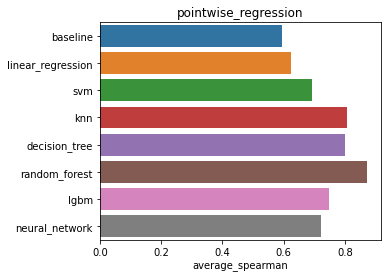

In [13]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean().dropna()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pointwise_regression')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_regression_estimator_comparison.svg')
plt.show()

***
## 2) Pointwise Classification

In [32]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_CLASSIFICATION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 2.1) Baseline

In [15]:
from sklearn.dummy import DummyClassifier

pipeline.change_estimator(DummyClassifier())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\documents\code\python\github\phase-2\src\pipeline\evaluation\evaluation_utils.py:222: RuntimeWarning: Mean of empty slice
  return np.nanmean(list_spearman(rf1, rf2))
 20%|████████████████████████▍                                                                                                 | 1/5 [00:06<00:27,  6.96s/it]c:\users\thomas\documents\code\python\github\phase-2\src\pipeline\evaluation\evaluation_utils.py:222: RuntimeWarning: Mean of empty slice
  return np.nanmean(list_spearman(rf1, rf2))
 40%|████████████████████████████████████████████████▊                                                                         | 2/5 [00:13<00:20,  6.96s/it]c:\users\thomas\documents\code\python\github\phase-2\src\pipeline\evaluation\evaluation_utils.py:222: RuntimeWarning: Mean of empty slice
  return np.nanmean(list_

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: nan
    validation_average_spearman_fold_1: nan
    validation_average_spearman_fold_2: nan
    validation_average_spearman_fold_3: nan
    validation_average_spearman_fold_4: nan
    average of all folds: nan [std=nan]


### 2.2) SVMs

In [ ]:
from sklearn.svm import SVC

pipeline.change_estimator(SVC())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

### 2.3) K-Nearest-Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier

pipeline.change_estimator(KNeighborsClassifier())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.65s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.3879
    validation_average_spearman_fold_1: 0.452
    validation_average_spearman_fold_2: 0.3554
    validation_average_spearman_fold_3: 0.2734
    validation_average_spearman_fold_4: 0.354
    average of all folds: 0.3645 [std=0.0578]


### 2.4) Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier

pipeline.change_estimator(DecisionTreeClassifier())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.92s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7555
    validation_average_spearman_fold_1: 0.7152
    validation_average_spearman_fold_2: 0.6941
    validation_average_spearman_fold_3: 0.7593
    validation_average_spearman_fold_4: 0.7353
    average of all folds: 0.7319 [std=0.0246]


### 2.5) Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

pipeline.change_estimator(RandomForestClassifier())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.20s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7494
    validation_average_spearman_fold_1: 0.7444
    validation_average_spearman_fold_2: 0.7018
    validation_average_spearman_fold_3: 0.7287
    validation_average_spearman_fold_4: 0.7603
    average of all folds: 0.7369 [std=0.0203]


### 2.6) Light Gradient Boosting Machine

In [36]:
from lightgbm import LGBMClassifier

pipeline.change_estimator(LGBMClassifier())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:25<00:00, 17.05s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6776
    validation_average_spearman_fold_1: 0.6694
    validation_average_spearman_fold_2: 0.6666
    validation_average_spearman_fold_3: 0.6867
    validation_average_spearman_fold_4: 0.6869
    average of all folds: 0.6774 [std=0.0085]


### 2.7) Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier

pipeline.change_estimator(MLPClassifier())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 20%|████████████████████████▍                                                                                                 | 1/5 [01:07<04:30, 67.61s/it]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Opti

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4134
    validation_average_spearman_fold_1: 0.3293
    validation_average_spearman_fold_2: 0.3599
    validation_average_spearman_fold_3: 0.3312
    validation_average_spearman_fold_4: 0.3767
    average of all folds: 0.3621 [std=0.0312]


random_forest     0.736928
decision_tree     0.731888
lgbm              0.677419
knn               0.364533
neural_network    0.362114
dtype: float64

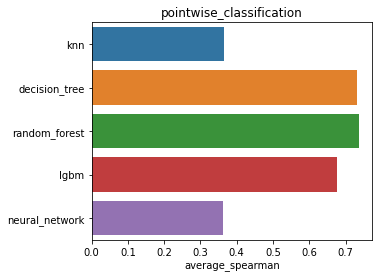

In [38]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean().dropna()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pointwise_classification')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_classification_estimator_comparison.svg')
plt.show()

***
## 3) Pointwise Ordinal Regression

In [23]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_ORDINAL_REGRESSION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 3.1) Baseline

In [ ]:
from sklearn.dummy import DummyClassifier

pipeline.change_estimator(DummyClassifier())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

### 3.2) SVMs

In [ ]:
from sklearn.svm import SVC

pipeline.change_estimator(SVC())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

### 3.3) K-Nearest-Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier

pipeline.change_estimator(KNeighborsClassifier())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.48s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.3324
    validation_average_spearman_fold_1: 0.3601
    validation_average_spearman_fold_2: 0.3579
    validation_average_spearman_fold_3: 0.3137
    validation_average_spearman_fold_4: 0.3269
    average of all folds: 0.3382 [std=0.0181]


### 3.4) Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

pipeline.change_estimator(DecisionTreeClassifier())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.18s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7603
    validation_average_spearman_fold_1: 0.7656
    validation_average_spearman_fold_2: 0.7248
    validation_average_spearman_fold_3: 0.7849
    validation_average_spearman_fold_4: 0.7619
    average of all folds: 0.7595 [std=0.0195]


### 3.5) Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

pipeline.change_estimator(RandomForestClassifier())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:46<00:00, 33.36s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6425
    validation_average_spearman_fold_1: 0.6907
    validation_average_spearman_fold_2: 0.6399
    validation_average_spearman_fold_3: 0.6048
    validation_average_spearman_fold_4: 0.6965
    average of all folds: 0.6549 [std=0.0343]


### 3.6) Light Gradient Boosting Machine

In [27]:
from lightgbm import LGBMClassifier

pipeline.change_estimator(LGBMClassifier())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


ValueError: y should be a 1d array, got an array of shape (36054, 31) instead.

### 3.7) Neural Networks

In [28]:
from sklearn.neural_network import MLPClassifier

pipeline.change_estimator(MLPClassifier())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 20%|████████████████████████▍                                                                                                 | 1/5 [01:05<04:20, 65.12s/it]c:\users\thomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Opti

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.517
    validation_average_spearman_fold_1: 0.5442
    validation_average_spearman_fold_2: 0.5065
    validation_average_spearman_fold_3: 0.5027
    validation_average_spearman_fold_4: 0.497
    average of all folds: 0.5135 [std=0.0167]


decision_tree     0.759531
random_forest     0.654878
neural_network    0.513460
knn               0.338202
dtype: float64

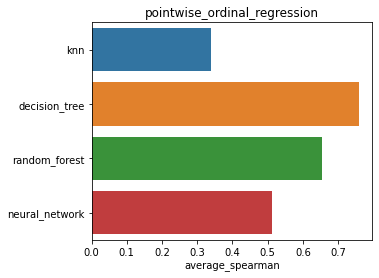

In [30]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean().dropna()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pointwise_ordinal_regression')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_ordinal_regression_estimator_comparison.svg')
plt.show()